<a href="https://colab.research.google.com/github/sagar9926/FlowerClassification/blob/master/Copy_of_Flower_category_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Colab library to upload files to notebook
#from google.colab import files

# Install Kaggle library
!pip install  kaggle

from keras import regularizers
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
#print(os.listdir("../input/flower-recognition-he/data"))
from tqdm import tqdm
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [46]:
!ls

myprediction_NN.csv  sample_submission.csv  test  test.csv  train  train.csv


In [0]:
!mkdir .kaggle

In [48]:
%cd content 

[Errno 2] No such file or directory: 'content'
/content/data


In [0]:
import json
token = {"username":"agrawalsagar178","key":"0b2f1c00f0d255a1ec1078bb4be5aba6"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [50]:
%cd content

[Errno 2] No such file or directory: 'content'
/content/data


In [9]:
%cd content


/content


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [53]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [55]:
! kaggle datasets download -d rednivrug/flower-recognition-he -p /content

flower-recognition-he.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
cd 
!ls

myprediction_NN.csv  sample_submission.csv  test  test.csv  train  train.csv


In [56]:
# Unzip the data
!unzip flower-recognition-he.zip

unzip:  cannot find or open flower-recognition-he.zip, flower-recognition-he.zip.zip or flower-recognition-he.zip.ZIP.


In [47]:
# Let's check the labels
train_category = pd.read_csv("data/train.csv")
train_category.head()

FileNotFoundError: ignored

In [17]:
#%cd content
%cd data
!ls

/content/data
sample_submission.csv  test  test.csv  train  train.csv


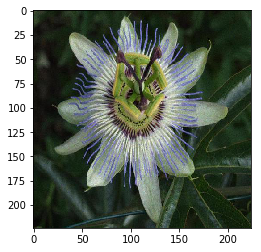

In [18]:

img = image.load_img('../data/train/'+train_category['image_id'][0].astype('str')+'.jpg', target_size=(224,224,1))
imgplot = plt.imshow(img)

In [19]:
#Next, we will read all the training images, store them in a list, 
#and finally convert #that list into a numpy array.

train_image = []
for i in tqdm(range(train_category.shape[0])):
    img = image.load_img('../data/train/'+train_category['image_id'][i].astype('str')+'.jpg', target_size=(50,50,1))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)




100%|██████████| 18540/18540 [01:11<00:00, 260.38it/s]


In [0]:
X[0]

array([[[0.21176471, 0.25882354, 0.16470589],
        [0.21568628, 0.24313726, 0.17254902],
        [0.14509805, 0.19607843, 0.1254902 ],
        ...,
        [0.11372549, 0.17254902, 0.09019608],
        [0.14509805, 0.21960784, 0.13333334],
        [0.13333334, 0.20784314, 0.12156863]],

       [[0.17254902, 0.24705882, 0.16078432],
        [0.13725491, 0.21176471, 0.13725491],
        [0.09019608, 0.14901961, 0.07450981],
        ...,
        [0.11764706, 0.16470589, 0.08627451],
        [0.14117648, 0.21568628, 0.12941177],
        [0.11372549, 0.1882353 , 0.10196079]],

       [[0.20784314, 0.26666668, 0.14509805],
        [0.11764706, 0.18039216, 0.07843138],
        [0.07058824, 0.07450981, 0.04313726],
        ...,
        [0.07450981, 0.14117648, 0.06666667],
        [0.10588235, 0.18039216, 0.09411765],
        [0.1764706 , 0.27058825, 0.1764706 ]],

       ...,

       [[0.05882353, 0.06666667, 0.04705882],
        [0.05490196, 0.0627451 , 0.04313726],
        [0.07058824, 0

In [0]:
X.shape

(18540, 50, 50, 3)

In [0]:
y=train_category['category'].values
y = to_categorical(y)

In [0]:
y.shape

(18540, 103)

In [21]:
train_category['category'].value_counts()

51     582
77     567
46     441
73     438
89     414
74     387
81     375
94     366
88     348
78     309
83     297
43     294
41     288
95     288
75     270
58     258
82     252
60     246
56     246
76     243
37     243
80     237
65     231
72     216
53     210
44     210
23     207
96     207
50     207
12     198
      ... 
64     117
61     114
19     111
15     111
49     111
100    111
13     111
14     108
102    108
93     105
9      105
33     105
32     102
6      102
10     102
35      99
67      96
24      96
39      93
79      93
25      93
26      93
16      93
34      90
3       90
21      90
7       90
1       90
27      90
45      90
Name: category, Length: 102, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)


# demonstrate effect on entire training dataset
train_iterator = datagen.flow(X_train, y_train, batch_size=128, shuffle=False) #what is the use of shuffle
val_iterator = datagen.flow(X_test, y_test, batch_size=len(y_test), shuffle=False)

In [27]:
# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(50, 50, 3),kernel_regularizer=regularizers.l2(0.0001))) #50,3
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same')) #50,5
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same')) #50,7
model1.add(Activation('relu'))
model1.add(BatchNormalization())


model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Convolution2D(32, 1, 1))
###################################################################################

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same')) #25,14
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same')) #25,16
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, 3, 3,border_mode='same')) #25,18
model1.add(Activation('relu'))
model1.add(BatchNormalization())


model1.add(MaxPooling2D(pool_size=(2, 2))) #12,36
model1.add(Dropout(0.2))

model1.add(Convolution2D(32, 1, 1))

###########################################################################

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same')) #12,38
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same')) #12,40
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(512, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same')) #12,42
model1.add(Activation('relu'))
model1.add(BatchNormalization())


model1.add(MaxPooling2D(pool_size=(2, 2)))#84
model1.add(Dropout(0.2))

model1.add(Convolution2D(32, 1, 1))


################################################################################
           
model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same')) #6,86
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(512, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same')) #6,88
model1.add(Activation('relu'))
model1.add(BatchNormalization())
         

model1.add(Convolution2D(103, 1, 1))

model1.add(AveragePooling2D(pool_size = (6,6)))

model1.add(Flatten())


model1.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(50, 50, 3..., kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., paddin

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(50, 50, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(103, activation='softmax'))

W0801 20:17:06.131458 139788051343232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0801 20:17:08.916804 139788051343232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



In [28]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 50, 50, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 50, 50, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 50, 50, 64)        256       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 50, 50, 128)       73856     
__________

In [0]:
model1.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [0]:
model.fit_generator(train_iterator, steps_per_epoch=np.ceil(X_train.shape[0]/128), verbose=1,nb_epoch=40,
                    validation_data=val_iterator,validation_steps = np.ceil(X_test.shape[0]/128))

In [31]:
model1.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Train on 14832 samples, validate on 3708 samples
Epoch 1/25
14832/14832 [==============================] - 29s 2ms/step - loss: 3.3755 - acc: 0.2226 - val_loss: 3.5078 - val_acc: 0.2193
Epoch 2/25
14832/14832 [==============================] - 26s 2ms/step - loss: 2.5075 - acc: 0.3801 - val_loss: 2.7969 - val_acc: 0.3118
Epoch 3/25
14832/14832 [==============================] - 26s 2ms/step - loss: 2.0416 - acc: 0.4910 - val_loss: 2.3949 - val_acc: 0.4199
Epoch 4/25
14832/14832 [==============================] - 26s 2ms/step - loss: 1.7155 - acc: 0.5697 - val_loss: 1.8686 - val_acc: 0.5278
Epoch 5/25
14832/14832 [==============================] - 26s 2ms/step - loss: 1.4559 - acc: 0.6404 - val_loss: 1.7419 - val_acc: 0.5499
Epoch 6/25
14832/14832 [==============================] - 26s 2ms/step - loss: 1.2529 - acc: 0.6928 - val_loss: 1.4146 - val_acc: 0.6470
Epoch 7/25
14832/14832 [==============================] - 26s 2ms/step - loss: 1.0962 - acc: 0.7377 - val_loss: 1.3584 - val_acc:

KeyboardInterrupt: ignored

In [32]:
model1.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Train on 14832 samples, validate on 3708 samples
Epoch 1/15
 1792/14832 [==>...........................] - ETA: 21s - loss: 0.1997 - acc: 0.9849

KeyboardInterrupt: ignored

#### Maximum accuracy achieved 85% in 17th epoch

In [33]:
df_test = pd.read_csv("../data/test.csv")
df_test['image_id'][0]

18540

In [34]:
test_image = []
for i in tqdm(range(df_test.shape[0])):
    img = image.load_img('../data/test/'+df_test['image_id'][i].astype('str')+'.jpg', target_size=(50,50,1))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|██████████| 2009/2009 [00:07<00:00, 262.82it/s]


In [35]:
prediction = model1.predict_classes(test)
prediction

array([ 9, 75, 40, ..., 77, 72, 51])

In [36]:

df_prediction= pd.DataFrame({'category':prediction})
df_prediction

,category
0,9
1,75
2,40
3,95
4,51
5,40
6,67
7,51
8,86
9,89


In [0]:
sample = pd.read_csv('../data/sample_submission.csv')

#sample['label'] = prediction
#sample.to_csv('sample_cnn.csv', header=True, index=False)

In [38]:
df_final= sample.iloc[:,[0]]
df_final=pd.concat([df_final,df_prediction],axis=1)
df_final

,image_id,category
0,18540,9
1,18541,75
2,18542,40
3,18543,95
4,18544,51
5,18545,40
6,18546,67
7,18547,51
8,18548,86
9,18549,89


In [0]:
pd.DataFrame(df_final).to_csv('myprediction_NN.csv',index = False)

In [0]:
from google.colab import files

files.download('myprediction_NN.csv')